In [76]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [77]:
# prompt: get the 'cocoId' column from the csv

import pandas as pd

df = pd.read_csv('nsd_stim_info_merged.csv')

In [78]:
df['cocoId']

0        532481
1        245764
2        385029
3        311303
4        393226
          ...  
72995    518071
72996    255930
72997    255934
72998    518080
72999    518083
Name: cocoId, Length: 73000, dtype: int64

In [79]:
dataDir='..'
dataType='train2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [164]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=6.04s)
creating index...
index created!


In [81]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
outdoor electronic kitchen appliance furniture animal accessory indoor sports vehicle person food


In [82]:
len(coco.getImgIds())

118287

In [165]:
unused_coco = list(set(coco.getImgIds()) - set(df['cocoId']))
len(unused_coco)

48236

In [166]:
unused_coco

[524291,
 393221,
 393224,
 393225,
 393227,
 131093,
 393241,
 524314,
 393243,
 524317,
 131101,
 262175,
 524320,
 131107,
 36,
 524325,
 393251,
 262184,
 393258,
 524331,
 262189,
 262191,
 49,
 393267,
 393268,
 131126,
 131127,
 393277,
 393284,
 393288,
 524361,
 393290,
 262221,
 77,
 393294,
 86,
 393306,
 262235,
 262238,
 393311,
 262242,
 524389,
 393317,
 109,
 393325,
 113,
 262260,
 524404,
 393333,
 393338,
 131197,
 262273,
 131203,
 136,
 262284,
 524428,
 262286,
 262285,
 131215,
 393362,
 524436,
 262299,
 393372,
 393375,
 524450,
 262307,
 262308,
 393379,
 393386,
 524459,
 131245,
 393394,
 262335,
 192,
 262336,
 393419,
 393421,
 393422,
 131279,
 131280,
 393428,
 393432,
 524508,
 393442,
 131300,
 262376,
 524525,
 241,
 131315,
 262391,
 247,
 524535,
 250,
 262394,
 393464,
 262399,
 131330,
 524547,
 260,
 393478,
 524551,
 131335,
 524557,
 262413,
 393487,
 131342,
 393489,
 393493,
 131352,
 262425,
 393497,
 524575,
 524577,
 131361,
 393508,
 1313

In [188]:
# get all images containing given categories, select one at random
# catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
# imgIds = coco.getImgIds(catIds=catIds );

imgIds = coco.getImgIds(unused_coco)
len(imgIds)

48236

In [ ]:

img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
img

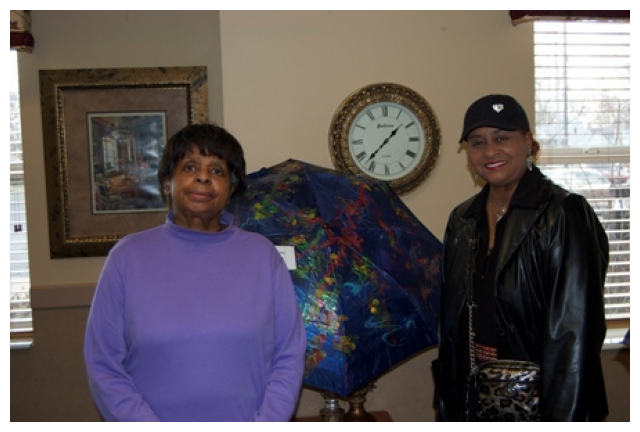

In [196]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

0

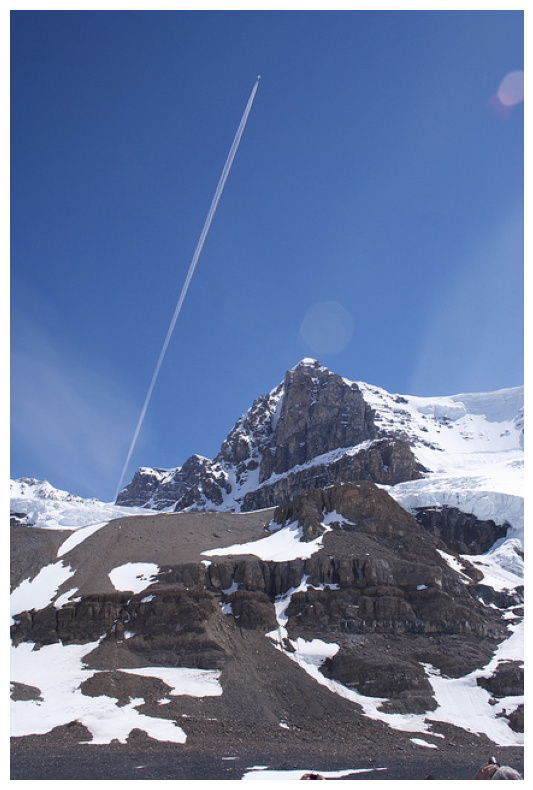

In [176]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [126]:
anns[0]['id'] #360595

506020

In [127]:
anns[0].keys

<function dict.keys>

In [107]:
anns[0]['area']


13894.769599999996

In [108]:
anns[0]['bbox']

[124.47, 110.2, 89.05, 256.61]

In [109]:
anns[0]['segmentation'][0]

[125.43,
 358.2,
 134.05,
 304.58,
 135.01,
 262.45,
 133.09,
 199.25,
 133.09,
 166.7,
 143.62,
 150.42,
 166.6,
 146.59,
 154.16,
 130.31,
 168.52,
 110.2,
 202.99,
 116.91,
 213.52,
 126.48,
 200.12,
 137.97,
 188.63,
 163.82,
 201.07,
 225.1,
 207.78,
 279.68,
 199.16,
 293.09,
 200.12,
 305.53,
 171.39,
 315.11,
 167.56,
 351.49,
 180.97,
 362.03,
 177.14,
 366.81,
 155.11,
 366.81,
 154.16,
 307.45,
 142.67,
 348.62,
 148.41,
 362.03,
 124.47,
 364.9]

In [158]:
img

{'license': 1,
 'file_name': '000000055809.jpg',
 'coco_url': 'http://images.cocodataset.org/train2017/000000055809.jpg',
 'height': 426,
 'width': 640,
 'date_captured': '2013-11-18 11:06:12',
 'flickr_url': 'http://farm6.staticflickr.com/5108/5653286849_ea02f02ba6_z.jpg',
 'id': 55809}

In [159]:
coco.imgs[img['id']]

{'license': 1,
 'file_name': '000000055809.jpg',
 'coco_url': 'http://images.cocodataset.org/train2017/000000055809.jpg',
 'height': 426,
 'width': 640,
 'date_captured': '2013-11-18 11:06:12',
 'flickr_url': 'http://farm6.staticflickr.com/5108/5653286849_ea02f02ba6_z.jpg',
 'id': 55809}

In [135]:
!pip install Pillow

DEPRECATION: Loading egg at /opt/homebrew/Caskroom/miniconda/base/envs/ajpreproc/lib/python3.12/site-packages/pycocotools-2.0-py3.12-macosx-11.0-arm64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [197]:
def calculate_object_loss(bboxes, crop_box):
    total_objects = len(bboxes)
    lost_objects = 0

    crop_x1, crop_y1, crop_x2, crop_y2 = crop_box

    for bbox in bboxes:
        x,y,w,h = bbox
        bbox_x1, bbox_y1 = x, y
        bbox_x2, bbox_y2 = x+w, y+h

        intersect_w = max(0, min(crop_x2, bbox_x2) - max(crop_x1, bbox_x1))
        intersect_h = max(0, min(crop_y2, bbox_y2) - max(crop_y1, bbox_y1))

        intersect_area = intersect_w * intersect_h

        bbox_area = w * h

        if intersect_area / bbox_area < 0.5:
            lost_objects += 1

    return lost_objects / total_objects if total_objects > 0 else 0

In [198]:
from PIL import Image
import requests
from io import BytesIO

img_url = coco.imgs[img['id']]['coco_url']
response = requests.get(img_url)
bboxes = [x['bbox'] for x in anns]

with Image.open(BytesIO(response.content)) as image:
    w, h = image.size
    min_dim = min(w, h)

    if min_dim < 425:
        exit()
        #return
    
    if w > h: # Landscape
        crops = [
            (0, 0, 425, h),
            ((w-425)//2, 0, (w+425)//2, h),
            ((w-425)//2, 0, w, h)
        ]
    else: # Portrait
        crops = [
            (0, 0, w, 425),
            (0, (h-425)//2, w, (h+425)//2),
            (0, h-425, w, h)
        ]
    
    min_loss = float('inf')
    best_crop = None
    for crop in crops:
        loss = calculate_object_loss(bboxes, crop)
        if loss < min_loss:
            min_loss = loss
            best_crop = crop

        # image.crop(crop).show()

    img_cropped = image.crop(best_crop)

    # if img_cropped.size != (425, 425):
    #     img_cropped = img_cropped.resize((425,425), Image.ANTIALIAS)
    
    # img_cropped.save("cropped_image.png")
    img_cropped.show()

: 

[[124.47, 110.2, 89.05, 256.61],
 [69.27, 141.3, 30.49, 87.14],
 [272.87, 140.97, 12.47, 69.69],
 [621.53, 177.58, 18.47, 54.14],
 [437.37, 177.19, 27.0, 56.52],
 [557.76, 174.92, 30.91, 100.21],
 [316.76, 264.75, 26.02, 111.82],
 [377.87, 177.32, 41.24, 84.99],
 [591.94, 216.43, 28.12, 60.6],
 [80.94, 155.04, 42.05, 127.88],
 [416.41, 172.39, 37.01, 63.7],
 [260.99, 205.35, 32.86, 33.79],
 [384.56, 250.66, 22.78, 11.82],
 [297.0, 165.32, 21.57, 38.16],
 [496.33, 188.95, 17.37, 39.47],
 [332.56, 140.13, 54.34, 249.97],
 [0, 131, 617, 113]]

In [129]:
len(coco.imgs.keys())

118287

In [130]:
"506020" in coco.imgs.keys()

False

In [72]:
anns_cat_ids = []
for i in range(3):
    anns_cat_ids.append(anns[i]['category_id'])
anns_cat_ids

[18, 1, 41]

In [13]:
# initialize COCO api for person keypoints annotations
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
coco_kps=COCO(annFile)

loading annotations into memory...
Done (t=0.24s)
creating index...
index created!


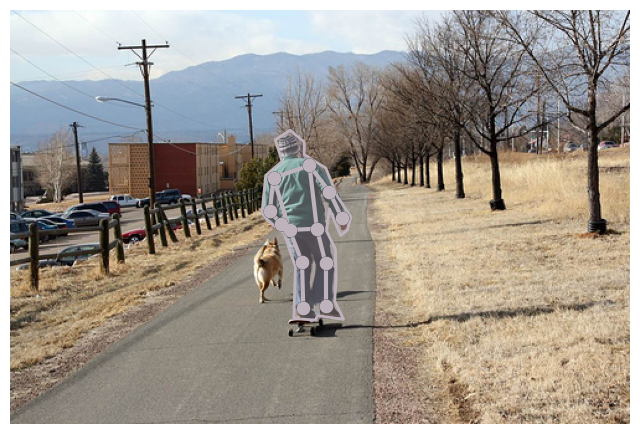

In [16]:
# load and display keypoints annotations
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)

In [17]:
# initialize COCO api for caption annotations
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!


A man is skate boarding down a path and a dog is running by his side.
A man on a skateboard with a dog outside. 
A person riding a skate board with a dog following beside.
This man is riding a skateboard behind a dog.
A man walking his dog on a quiet country road.


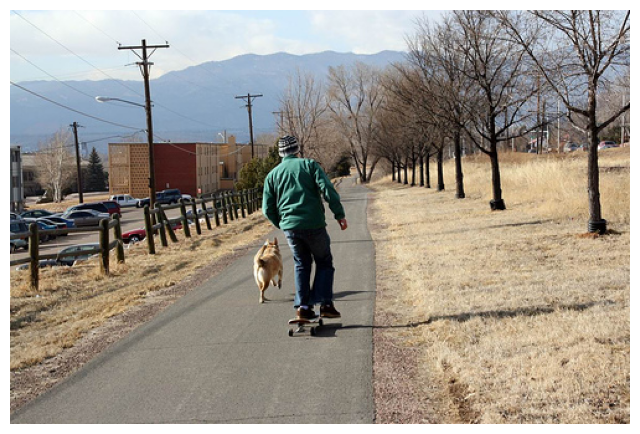

In [18]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()